##### 课程练习

* 决策问题/基于搜索

In [1]:
import matplotlib
print(matplotlib.__path__)

['/Users/yeah/anaconda3/lib/python3.7/site-packages/matplotlib']


In [2]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [3]:
import networkx as nx

In [4]:
import re

In [5]:
city_location = {}

In [6]:
test_string = "{name:'兰州',  geoCoord:[103.73, 36.03]}"

In [7]:
pattern = r"name:'(\w+)', geoCoord:\[(\d+.?\d+), (\d+.?\d+)\]"

In [8]:
re.findall(pattern, test_string)

[]

In [9]:
for line in coordination_source.split('\n') : 
    city_info = re.findall(pattern, line)
    if not city_info : continue
        
    city, long, lat = city_info[0]    
    city_location[city] = (float(long), float(lat))    

In [10]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [11]:
import math

In [12]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [13]:
def get_geo_distance(city1, city2) : 
    return geo_distance(city_location[city1], city_location[city2])

In [14]:
get_geo_distance('兰州', '成都')

147.69829169296833

In [15]:
get_geo_distance('上海', '杭州')

153.5185697155768

In [16]:
import networkx as nx

In [17]:
city_graph = nx.Graph()

In [18]:
city_graph.add_nodes_from(city_location.keys())

In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt

In [21]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

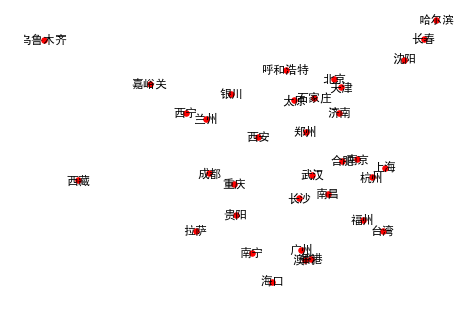

In [22]:
nx.draw(city_graph, city_location, with_labels = True, node_size = 30)

/Users/yeah/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


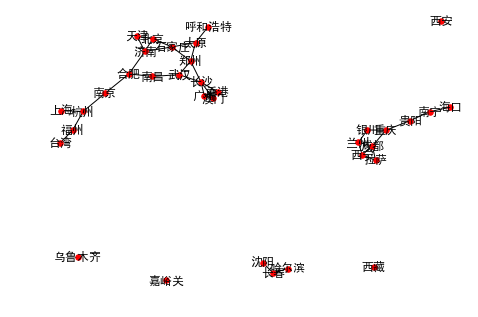

In [368]:
nx.draw(city_graph, with_labels = True, node_size = 30)

In [46]:
from collections import defaultdict

In [36]:
simple_connection_info = {
    '北京' : ['太原', '沈阳'],
    '沈阳' : ['北京'],
    '太原' : ['北京', '西安', '郑州'],
    '郑州' : ['太原'],
    '兰州' : ['西安'],
    '西安' : ['兰州', '长沙'],
    '长沙' : ['福州', '南宁']
}

/Users/yeah/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


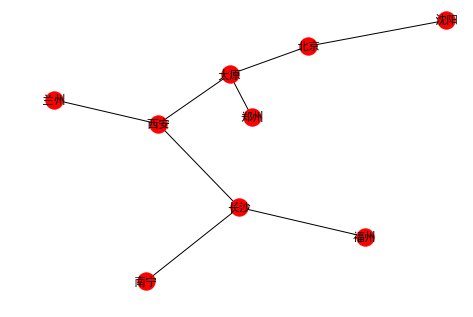

In [37]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True)

输入起点，终点，获取能到达目的地的路线
###### 思考过程
如：北京 -> 福州
* 查看起点的连接点  
    北京 -> [太原, 沈阳]
* 获取到所有连接点后，看连接点的连接情况 
    太原 -> [西安, 郑州]，沈阳 -> [北京]
    其中'北京'已经看过，则沈阳 -> 北京 无效
    太原 -> [西安, 郑州]
* 西安 -> [兰州, 长沙] 郑州 -> [太原]
    西安 -> [兰州, 长沙]
* 兰州 -> [西安] 长沙 -> [南宁, 福州]
    长沙 -> [南宁, 福州]
* 南宁 -> [长沙] 福州（目的地）
* 北京 -> 太原 -> 西安 -> 长沙 -> 福州

In [194]:
# 路线搜索 breath first 广度优先
def search_by_bfs(city1, city2, connection_graph) :
    # 探索的所有路线  已知开始路线  
    paths = [[city1]]
    
    # visited 已查看过
    visited = set()
    # 需要继续扩展
    while paths : 
        print("paths")
        print(paths)
        # 弹出头部
        path = paths.pop() 
        print("path")
        print(path)
        # 获取路线的尾部
        froninter = path[-1]
        # 尾部是否已经访问
        if froninter in visited : continue
        # 未访问，获取所有节点    
        successors = connection_graph[froninter]
        
        for city in successors : 
            #去除 [北京，沈阳，北京] 这种回路探索
            if city in path : continue
            new_path = path + [city]
            paths = [new_path] + paths
            if city == city2 : return new_path
        # 添加访问过的城市
        visited.add(froninter)
    

In [197]:
# 路线搜索 depth first 深度优先
def search_by_dfs(city1, city2, connection_graph) :
    # 探索的所有路线  已知开始路线  
    paths = [[city1]]
    
    # visited 已查看过
    visited = set()
    # 需要继续扩展
    while paths : 
        print("paths")
        print(paths)
        # 弹出头部
        path = paths.pop() 
        print("path")
        print(path)
        # 获取路线的尾部
        froninter = path[-1]
        # 尾部是否已经访问
        if froninter in visited : continue
        # 未访问，获取所有节点    
        successors = connection_graph[froninter]
        
        for city in successors : 
            #去除 [北京，沈阳，北京] 这种回路探索
            if city in path : continue
            new_path = path + [city]
            paths.append(new_path)
            if city == city2 : return new_path
        # 添加访问过的城市
        visited.add(froninter)
    

In [40]:
# 未判断 city 是否在 path 中
search('北京', '福州', simple_connection_info)

[['北京']]
[['北京', '太原'], ['北京', '沈阳']]
[['北京', '沈阳'], ['北京', '太原', '北京'], ['北京', '太原', '西安'], ['北京', '太原', '郑州']]
[['北京', '太原', '北京'], ['北京', '太原', '西安'], ['北京', '太原', '郑州'], ['北京', '沈阳', '北京']]
[['北京', '太原', '西安'], ['北京', '太原', '郑州'], ['北京', '沈阳', '北京']]
[['北京', '太原', '郑州'], ['北京', '沈阳', '北京'], ['北京', '太原', '西安', '兰州'], ['北京', '太原', '西安', '长沙']]
[['北京', '沈阳', '北京'], ['北京', '太原', '西安', '兰州'], ['北京', '太原', '西安', '长沙'], ['北京', '太原', '郑州', '太原']]
[['北京', '太原', '西安', '兰州'], ['北京', '太原', '西安', '长沙'], ['北京', '太原', '郑州', '太原']]
[['北京', '太原', '西安', '长沙'], ['北京', '太原', '郑州', '太原'], ['北京', '太原', '西安', '兰州', '西安']]


['北京', '太原', '西安', '长沙', '福州']

In [38]:
# 判断 city 是否在 path 中
search('北京', '福州', simple_connection_info)

[['北京']]
[['北京', '太原'], ['北京', '沈阳']]
[['北京', '沈阳'], ['北京', '太原', '西安'], ['北京', '太原', '郑州']]
[['北京', '太原', '西安'], ['北京', '太原', '郑州']]
[['北京', '太原', '郑州'], ['北京', '太原', '西安', '兰州'], ['北京', '太原', '西安', '长沙']]
[['北京', '太原', '西安', '兰州'], ['北京', '太原', '西安', '长沙']]
[['北京', '太原', '西安', '长沙']]


['北京', '太原', '西安', '长沙', '福州']

In [198]:
print("==========bfs==========")
search_by_bfs('北京', '福州', simple_connection_info)
print("==========dfs==========")
search_by_dfs('北京', '福州', simple_connection_info)

==========bfs==========
paths
[['北京']]
path
['北京']
paths
[['北京', '沈阳'], ['北京', '太原']]
path
['北京', '太原']
paths
[['北京', '太原', '郑州'], ['北京', '太原', '西安'], ['北京', '沈阳']]
path
['北京', '沈阳']
paths
[['北京', '太原', '郑州'], ['北京', '太原', '西安']]
path
['北京', '太原', '西安']
paths
[['北京', '太原', '西安', '长沙'], ['北京', '太原', '西安', '兰州'], ['北京', '太原', '郑州']]
path
['北京', '太原', '郑州']
paths
[['北京', '太原', '西安', '长沙'], ['北京', '太原', '西安', '兰州']]
path
['北京', '太原', '西安', '兰州']
paths
[['北京', '太原', '西安', '长沙']]
path
['北京', '太原', '西安', '长沙']
==========dfs==========
paths
[['北京']]
path
['北京']
paths
[['北京', '太原'], ['北京', '沈阳']]
path
['北京', '沈阳']
paths
[['北京', '太原']]
path
['北京', '太原']
paths
[['北京', '太原', '西安'], ['北京', '太原', '郑州']]
path
['北京', '太原', '郑州']
paths
[['北京', '太原', '西安']]
path
['北京', '太原', '西安']
paths
[['北京', '太原', '西安', '兰州'], ['北京', '太原', '西安', '长沙']]
path
['北京', '太原', '西安', '长沙']


['北京', '太原', '西安', '长沙', '福州']

##### breath first search 广度优先
* 一级一级探索，每层探索完再开始下一层

##### depth first search 深度优先
* 选择一条路一直探索，直至无法探索

##### 广度/深度 区别
* 广度优先会基于旧的点遍历，深度会基于最新的点遍历
* 扩展顺序决定搜索方式

In [97]:
# 深度优先搜索，给定初始点，遍历整个图
def dfs(graph, start) : 
    """
    breath first search
    """
    visited = [start]
    seen = set()
    print(start)
    while visited : 
        # 获取最新的
        froninter = visited.pop()
        
        if froninter in seen : continue
            
        for successors in graph[froninter] : 
            if successors in seen : continue
            print(successors)
            visited.append(successors)
            
        seen.add(froninter)    
    return seen

In [98]:
# 广度度优先搜索，给定初始点，遍历整个图
def bfs(graph, start) : 
    """
    depth first search
    """
    visited = [start]
    seen = set()
    print(start)
    while visited : 
        # 获取最新的
        froninter = visited.pop()
        
        if froninter in seen : continue
            
        for successors in graph[froninter] : 
            if successors in seen : continue
            print(successors)
            visited =  [successors] + visited
            
        seen.add(froninter)    
        
    return seen

/Users/yeah/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


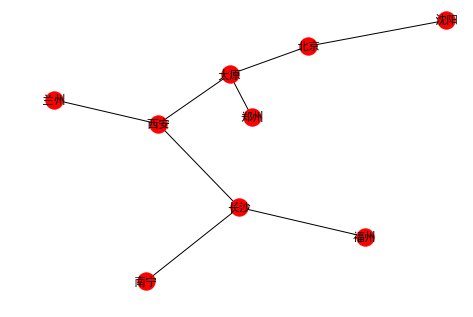

In [71]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True)

In [85]:
num_graph = defaultdict(list)
num_graph_ = {
    1 : [2,3],
    2 : [1,4],
    3 : [1,5],
    4 : [2,6],
    5 : [3,7],
    6 : [4],
    7 : [5]
}
num_graph.update(num_graph_)

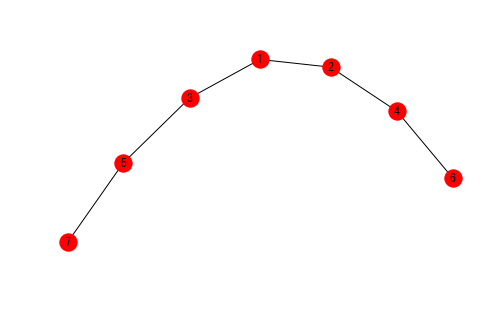

In [86]:
nx.draw(nx.Graph(num_graph), with_labels=True)

In [185]:
simple_connection_info_def = defaultdict(list)
simple_connection_info_def.update(simple_connection_info)
print("==========bfs==========")
bfs(num_graph, 1)
print("==========dfs==========")
dfs(num_graph, 1)

==========bfs==========
1
2
3
4
5
6
7
==========dfs==========
1
2
3
5
7
4
6


{1, 2, 3, 4, 5, 6, 7}

In [108]:
threshold = 300

In [110]:
city_graph

In [170]:
city_connection = defaultdict(set)

In [171]:
for c1 in city_location : 
    for c2 in city_location : 
        if c1 == c2 : continue
        if get_geo_distance(c1, c2) <= threshold : 
#             city_graph.add_edge(c1, c2)
            city_connection[c1].add(c2)
            city_connection[c2].add(c1)

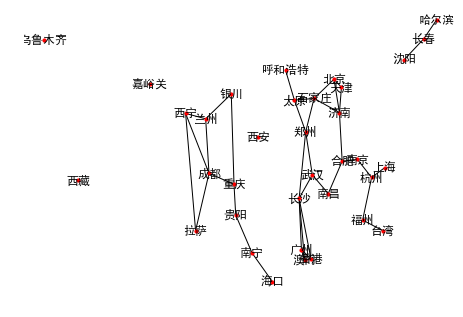

In [204]:
# [['北京', '济南', '合肥', '南昌'], ['北京', '石家庄', '郑州', '武汉', '南昌']]
nx.draw(city_graph, city_location, with_labels = True, node_size = 10,front_size=1)

In [172]:
city_connection

defaultdict(set,
            {'兰州': {'成都', '西宁', '银川'},
             '西宁': {'兰州', '成都', '拉萨'},
             '成都': {'兰州', '拉萨', '西宁', '重庆'},
             '银川': {'兰州', '重庆'},
             '拉萨': {'成都', '西宁'},
             '重庆': {'成都', '贵阳', '银川'},
             '石家庄': {'北京', '太原', '济南', '郑州'},
             '郑州': {'太原', '武汉', '石家庄', '长沙'},
             '济南': {'北京', '合肥', '天津', '石家庄'},
             '太原': {'呼和浩特', '石家庄', '郑州'},
             '北京': {'天津', '济南', '石家庄'},
             '贵阳': {'南宁', '重庆'},
             '南宁': {'海口', '贵阳'},
             '武汉': {'南昌', '郑州', '长沙'},
             '南昌': {'合肥', '武汉'},
             '长沙': {'广州', '武汉', '澳门', '郑州', '香港'},
             '合肥': {'南京', '南昌', '济南'},
             '天津': {'北京', '济南'},
             '南京': {'合肥', '杭州'},
             '杭州': {'上海', '南京', '福州'},
             '福州': {'台湾', '杭州'},
             '上海': {'杭州'},
             '台湾': {'福州'},
             '广州': {'澳门', '长沙', '香港'},
             '香港': {'广州', '澳门', '长沙'},
             '澳门': {'广州', '长沙', '香港'}

In [119]:
search_by_bfs('兰州', '海口', city_connection)

[['兰州']]
[['兰州', '银川'], ['兰州', '成都'], ['兰州', '西宁'], ['兰州', '银川'], ['兰州', '成都'], ['兰州', '西宁']]
[['兰州', '银川', '重庆'], ['兰州', '银川', '重庆'], ['兰州', '成都'], ['兰州', '西宁'], ['兰州', '银川'], ['兰州', '成都'], ['兰州', '西宁']]
[['兰州', '银川', '重庆', '贵阳'], ['兰州', '银川', '重庆', '成都'], ['兰州', '银川', '重庆', '贵阳'], ['兰州', '银川', '重庆', '成都'], ['兰州', '银川', '重庆'], ['兰州', '成都'], ['兰州', '西宁'], ['兰州', '银川'], ['兰州', '成都'], ['兰州', '西宁']]
[['兰州', '银川', '重庆', '贵阳', '南宁'], ['兰州', '银川', '重庆', '贵阳', '南宁'], ['兰州', '银川', '重庆', '成都'], ['兰州', '银川', '重庆', '贵阳'], ['兰州', '银川', '重庆', '成都'], ['兰州', '银川', '重庆'], ['兰州', '成都'], ['兰州', '西宁'], ['兰州', '银川'], ['兰州', '成都'], ['兰州', '西宁']]


['兰州', '银川', '重庆', '贵阳', '南宁', '海口']

In [227]:
# 路线搜索 breath first 广度优先
def search(city1, city2, connection_graph, sort_by) :
    # 探索的所有路线  已知开始路线  
    paths = [[city1]]
    valid_paths = []
    # visited 已查看过
    visited = set()
    # 需要继续扩展
    while paths : 
        print(paths)
        # 弹出头部
        path = paths.pop() 
        # 获取路线的尾部
        froninter = path[-1]
        # 尾部是否已经访问
        if froninter in visited : continue
        # 未访问，获取所有节点    
        successors = connection_graph[froninter]
        
        for city in successors : 
            #去除 [北京，沈阳，北京] 这种回路探索
            if city in path : continue
            new_path = path + [city]
            paths = [new_path] + paths
            if city == city2 : 
                valid_paths.append(new_path) 
#                 return new_path
        # 添加访问过的城市
        visited.add(froninter)
        # 针对已探索路线排序
        paths = sort_by(paths)
    return sort_by(valid_paths)    

In [228]:
def transfer_station_first(paths) : 
    return sorted(paths, key=len, reverse=False)

In [229]:
search('北京', '广州', city_connection, sort_by=transfer_station_first)

[['北京']]
[['北京', '石家庄'], ['北京', '天津'], ['北京', '济南']]
[['北京', '石家庄'], ['北京', '天津'], ['北京', '济南', '天津'], ['北京', '济南', '石家庄'], ['北京', '济南', '合肥']]
[['北京', '石家庄'], ['北京', '天津'], ['北京', '济南', '天津'], ['北京', '济南', '石家庄'], ['北京', '济南', '合肥', '南京'], ['北京', '济南', '合肥', '南昌']]
[['北京', '石家庄'], ['北京', '天津'], ['北京', '济南', '天津'], ['北京', '济南', '石家庄'], ['北京', '济南', '合肥', '南京'], ['北京', '济南', '合肥', '南昌', '武汉']]
[['北京', '石家庄'], ['北京', '天津'], ['北京', '济南', '天津'], ['北京', '济南', '石家庄'], ['北京', '济南', '合肥', '南京'], ['北京', '济南', '合肥', '南昌', '武汉', '长沙'], ['北京', '济南', '合肥', '南昌', '武汉', '郑州']]
[['北京', '石家庄'], ['北京', '天津'], ['北京', '济南', '天津'], ['北京', '济南', '石家庄'], ['北京', '济南', '合肥', '南京'], ['北京', '济南', '合肥', '南昌', '武汉', '长沙'], ['北京', '济南', '合肥', '南昌', '武汉', '郑州', '太原'], ['北京', '济南', '合肥', '南昌', '武汉', '郑州', '石家庄'], ['北京', '济南', '合肥', '南昌', '武汉', '郑州', '长沙']]
[['北京', '石家庄'], ['北京', '天津'], ['北京', '济南', '天津'], ['北京', '济南', '石家庄'], ['北京', '济南', '合肥', '南京'], ['北京', '济南', '合肥', '南昌', '武汉', '长沙'], ['北京', '济南', '合肥', '南昌', '武汉

[['北京', '济南', '合肥', '南昌', '武汉', '郑州', '长沙', '广州'],
 ['北京', '济南', '合肥', '南昌', '武汉', '郑州', '长沙', '香港', '广州'],
 ['北京', '济南', '合肥', '南昌', '武汉', '郑州', '长沙', '香港', '澳门', '广州']]

##### 深度学习
* 波士顿房价
* 基于数据生成函数

In [230]:
from sklearn.datasets import load_boston

In [235]:
data = load_boston()

In [232]:
help(load_boston)

Help on function load_boston in module sklearn.datasets.base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============     ==============
    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.
    ==============     ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of bost

In [233]:
help(defaultdict)

Help on class defaultdict in module collections:

class defaultdict(builtins.dict)
 |  defaultdict(default_factory[, ...]) --> dict with default factory
 |  
 |  The default factory is called without arguments to produce
 |  a new value when a key is not present, in __getitem__ only.
 |  A defaultdict compares equal to a dict with the same items.
 |  All remaining arguments are treated the same as if they were
 |  passed to the dict constructor, including keyword arguments.
 |  
 |  Method resolution order:
 |      defaultdict
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__(...)
 |      D.copy() -> a shallow copy of D.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __missing__(...)
 |      __missing__(key) # Called by __getitem__ for missing key; pseudo-code:
 |      if self.default_facto

In [236]:
x, y = data['data'], data['target']

In [244]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [242]:
y[0]

24.0

In [247]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [249]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [253]:
len(x[:, 0])

506

In [255]:
len(y)

506

In [257]:
%matplotlib inline

In [261]:
def draw_rm_price() : 
    plt.scatter(x[:, 5], y)

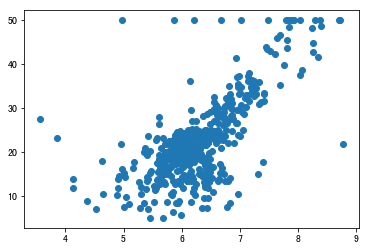

In [262]:
draw_rm_price()

##### 问题
1. 怎么获取一个拟合函数，那么这个函数是什么？
2. 假定 f(x) = kx + b，那么 k、b分别是多少？
3. 随机 k、b
4. 判断 f(x) 值与实际值的差值，差值越小，越接近，差值为损失值

In [263]:
import random

In [313]:
def price(rm, k, b) : 
    return k * rm + b

In [316]:
list(zip(list(y), list(price_rm)))[0]

(24.0, -83.325)

In [319]:
def loss(y, y_hat) : 
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [321]:
loss(y, price_rm)

10782.54878475691

In [322]:
x, y = data['data'], data['target']
# 房间数量
x_rm = x[:, 5]

* 方法一 ：随机生成k、b，获取最接近的k、 b
    k、b 的随机范围为 [-100, 100]的整数
* 方法二 ：基于方法一，扩大k、b范围，且为浮点数

* 总结：方法一、方法二，k、b仍是随机数，无法预知控制，误差也无法控制，同时计算次数十分耗时对误差缩小也没有绝对帮助

* 问题：怎么让误差减少的更快？

* 方法三 ：控制变化方向 k、b的正负影响着误差的变化，确定正确的变化方向以及增量
                程序上监督变化---监督学习
                
* 问题：函数的可变因素越多，需要控制的方向越多！！！
            下一个方向？可能选择错误的方向，可以想办法在这里选择正确的方向！！！
            导数！！！
            loss()函数的导数，就是差值变化的方向（增加/减少）也可以找到临界点，二次函数则有凹点最小或凸点最大！！！
            找指定点导数小于0
            梯度下降！！！

In [350]:
try_times = 100000

def gen_best_by_random(try_times) : 
    """随机生成k、b，获取最接近的k、 b"""
    min_loss = float('inf')
    best_k, best_b = None, None
    for i in range(try_times) : 
        k = random.randint(-100, 100)
        b = random.randint(-100, 100)
        price_rm = [price(rm, k, b) for rm in x_rm]

        current_loss = loss(y, price_rm)
        if current_loss < min_loss : 
            min_loss = current_loss
            best_k = k
            best_b = b
            print("times {}, min loss {}, best k {}, best b {}".format(i, min_loss, best_k, best_b))
            
    print("min loss {}, best k {}, best b {}".format(min_loss, best_k, best_b))

    best_price_rm = [price(rm, best_k, best_b) for rm in x_rm]
    draw_rm_price()
    plt.scatter(x_rm, best_price_rm)

min loss 43.6065241245059, best k 9, best b -34


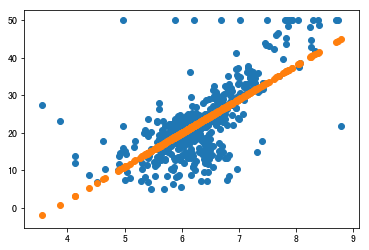

In [351]:
gen_best_by_random(try_times)

In [346]:
random.random() * 20000 - 10000

-9709.34007629706

In [354]:
def gen_best_by_random(try_times) : 
    """基于方法一，扩大k、b范围，且为浮点数"""
    min_loss = float('inf')
    best_k, best_b = None, None
    for i in range(try_times) : 
        k = random.random() * 20000 - 10000
        b = random.random() * 20000 - 10000
        price_rm = [price(rm, k, b) for rm in x_rm]

        current_loss = loss(y, price_rm)
        if current_loss < min_loss : 
            min_loss = current_loss
            best_k = k
            best_b = b
            print("times {}, min loss {}, best k {}, best b {}".format(i, min_loss, best_k, best_b))
            
    print("min loss {}, best k {}, best b {}".format(min_loss, best_k, best_b))

    best_price_rm = [price(rm, best_k, best_b) for rm in x_rm]
    draw_rm_price()
    plt.scatter(x_rm, best_price_rm)

min loss 1249.5110716563977, best k -33.972518314421905, best b 218.9569070365378


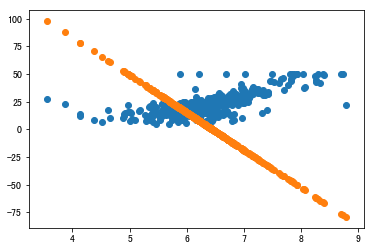

In [353]:
gen_best_by_random(try_times)

In [366]:
def gen_best_by_random(try_times) : 
    """控制变化方向 k、b的正负影响着误差的变化"""
    min_loss = float('inf')
    best_k, best_b = None, None
    
    """初始化一组k、b"""
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    """变化方向 分别为 k、b的变化方向"""
    direction = [
        (+1, +1),
        (+1, -1),
        (-1, +1),
        (-1, -1)
    ]
    scanner = 0.1
    
    next_direction = random.choice(direction)
    for i in range(try_times) : 
        k_direction, b_direction = next_direction
        
        if best_k == None : best_k = k
        if best_b == None : best_b = b
        
        current_k, current_b = best_k + k_direction * scanner, best_b + b_direction * scanner
        price_rm = [price(rm, current_k, current_b) for rm in x_rm]

        current_loss = loss(y, price_rm)
        if current_loss < min_loss : 
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            next_direction = next_direction
            print("times {}, min loss {}, best k {}, best b {}".format(i, min_loss, best_k, best_b))
        else : 
            next_direction = random.choice(list(set(direction) - {next_direction}))

    print("min loss {}, best k {}, best b {}".format(min_loss, best_k, best_b))
    
    best_price_rm = [price(rm, best_k, best_b) for rm in x_rm]
    draw_rm_price()
    plt.scatter(x_rm, best_price_rm)

times 0, min loss 124550.76893143087, best k -58.6897909161466, best b 41.74420827382087
times 1, min loss 124174.83702167223, best k -58.5897909161466, best b 41.644208273820865
times 2, min loss 123799.47351303033, best k -58.489790916146596, best b 41.544208273820864
times 3, min loss 123424.67840550496, best k -58.389790916146595, best b 41.44420827382086
times 4, min loss 123050.45169909611, best k -58.28979091614659, best b 41.34420827382086
times 5, min loss 122676.79339380353, best k -58.18979091614659, best b 41.24420827382086
times 6, min loss 122303.70348962753, best k -58.08979091614659, best b 41.14420827382086
times 7, min loss 121931.18198656784, best k -57.98979091614659, best b 41.04420827382086
times 8, min loss 121559.22888462496, best k -57.88979091614659, best b 40.944208273820855
times 9, min loss 121187.84418379838, best k -57.789790916146586, best b 40.844208273820854
times 10, min loss 120817.0278840883, best k -57.689790916146585, best b 40.74420827382085
time

times 477, min loss 9759.55312642713, best k -10.989790916146012, best b -5.955791726179454
times 478, min loss 9654.748549230726, best k -10.889790916146012, best b -6.055791726179454
times 479, min loss 9550.512373150821, best k -10.789790916146012, best b -6.155791726179453
times 480, min loss 9446.844598187394, best k -10.689790916146013, best b -6.255791726179453
times 481, min loss 9343.745224340439, best k -10.589790916146013, best b -6.3557917261794525
times 482, min loss 9241.214251609987, best k -10.489790916146013, best b -6.455791726179452
times 483, min loss 9139.251679996001, best k -10.389790916146014, best b -6.555791726179452
times 484, min loss 9037.857509498503, best k -10.289790916146014, best b -6.6557917261794515
times 485, min loss 8937.031740117489, best k -10.189790916146015, best b -6.755791726179451
times 486, min loss 8836.77437185295, best k -10.089790916146015, best b -6.855791726179451
times 487, min loss 8737.085404704894, best k -9.989790916146015, best

min loss 44.89334762167775, best k 7.510209083853956, best b -24.455791726179537


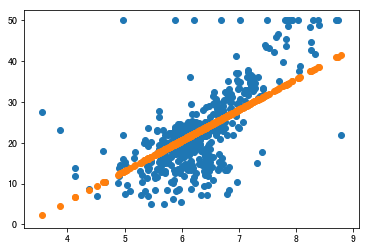

In [367]:
gen_best_by_random(try_times)

##### 地铁爬虫练习 

In [1]:
# 安装 Beautiful Soup
!pip install beautifulsoup4

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [95]:
# spider
import requests
from bs4 import BeautifulSoup
import re
import networkx as nx
import matplotlib.pyplot as plt

#站点类 
class Station :
    """
    name : 站点名
    line_lable : 所属线
    next_stations : 连接的站点
    """
    def __init__(self, name="", line_lable="", next_stations = []):
        self.name, self.line_lable, self.next_stations = name, line_lable, next_stations
        
    def setName(self, name="") : self.name = name
    def getName(self) : return self.name

    def setLineLable(self, line_lable="") : self.line_lable = line_lable
    def getLineLable(self) : return self.line_lable 
    
    def setNextStations(self, next_stations = []) : self.next_stations = next_stations
    def getNextStations(self) : return self.next_stations    
    
    def to_str(self) : 
        return "name = " + self.name + ",line_lable = " + self.line_lable + ",next_stations = " + str(self.next_stations)
    
# 请求头
def headers() : 
    header = {
     "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.89 "
     "Safari/537.36"
     }
    return header

# 站点url
def source() : 
    return 'https://baike.baidu.com'

# 详情url
def contact_item(item) : 
    return source() + item

# 爬取源码
def spider(url, encode) : 
    header = headers()
    res = requests.get(url,  headers=header)
    res.encoding = encode
    soup = BeautifulSoup(res.text)
    return soup

# 地铁线 + 链接
def line_and_href(tables) : 
    lfs = {}
    for t in tables : 
        tds = t.find_all('td')
        for td in tds : 
            if re.findall(r'北京地铁.*线', str(td)) : 
                lfs[td.get_text()] = td.a.get('href')
    return lfs

# 获取所有地铁线及链接
def all_lfs(soup) : 
    tables = soup.find_all('table')
    pat = r"<tr><th.*>线路</th><th.*>起止点</th><th.*>首班</th><th>末班</th></tr><tr>"
    mts = [t for t in tables if re.findall(pat, str(t))]
    lfs = line_and_href(mts)
    return lfs

def stations(lfs) : 
    # 地铁路线
    lines = {}
    
    for k, v in lfs.items() : 
        preferred_pat = r"" + str(k[4:] + ".{0,6}首末班?车时[刻|间]表?").replace('(', '\(?').replace('（', '（?').replace(')', '\)?').replace('）', '）?')
        print("spider " + k)
        optional_pat = r"车站信息"
        special_pat = r"<tr><th.*>车?站?编号</th><th.*>车站名称.*</th>.*<tr>"
        soup = spider(contact_item(v), 'utf-8')
        tables = soup.find_all('table')
        
        tagets = [tab for tab in tables if re.findall(preferred_pat, str(tab))]
        if  len(tagets) > 0 :
            print(preferred_pat)
            trs = tagets[0].find_all('tr')
            stations = [list(tr.children)[0].get_text() for tr in trs[1:] if list(tr.children) and (not re.findall(r"参考|车站|时间|方向|全程|(备?注)|(\d{4}年\d{1,2}月)", str(tr)))]
            if re.findall(r"内|外环", str(trs[0])) : 
                print("环线")
                stations.append(stations[0])
            lines[k] = stations
            continue
            
        tagets = [tab for tab in tables if re.findall(optional_pat, str(tab))]
        if  len(tagets) > 0 : 
            print(optional_pat)
            trs = tagets[0].find_all('tr')
            stations = [list(tr.children)[1].get_text().replace("\n", "") for tr in trs[1:] if list(tr.children) and (not re.findall(r"参考|时间|方向|全程|(备?注)|(\d{4}年\d{1,2}月)", str(tr)))]
            if re.findall(r"内|外环", str(trs[0])) : 
                print("环线")
                stations.append(stations[0])
            lines[k] = stations
            continue
            
        tagets = [tab for tab in tables if re.findall(special_pat, str(tab))]
        if  len(tagets) > 0 : 
            print(special_pat)
            trs = tagets[0].find_all('tr')
            stations = [list(tr.children)[1].get_text().replace("\n", "") for tr in trs[1:] if list(tr.children) and (not re.findall(r"参考|时间|方向|全程|(备?注)", str(tr)))]
            if re.findall(r"[内外]环", str(trs[0])) : 
                print("环线")
                stations.append(stations[0])
            lines[k] = stations
            continue     

    return lines
            
# 生成地铁图
def create_line_graph(lines) : 
    gragh = {}
    # 生成所有站点信息    
    for line_lable,stations in lines.items() : 
        for station in stations : 
            s = Station(name=station, line_lable=line_lable, next_stations = [])
            if not station in gragh : 
                gragh[station] = s
    
    # 关联所有相邻站点
    for line_lable,stations in lines.items() : 
        for i, station in enumerate(stations) : 
            current_ = gragh[station]
            if i != 0 or i != len(stations) - 1 : 
                if i - 1 >= 0 : 
                    pre_station = stations[i - 1]
                    current_.setNextStations(current_.getNextStations() + [pre_station])
                
                if i + 1 <= len(stations) - 1 : 
                    next_station = stations[i + 1]
                    current_.setNextStations(current_.getNextStations() + [next_station])

    return gragh        

# 路线查询
def search(start, destination, gragh):
    pathes = [[start]]
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]

        if froninter in visitied: continue
            
        successors = gragh[froninter].getNextStations()
        
        for station in successors:
            if station in path: continue  # eliminate loop
                
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if station == destination: return new_path
        
        visitied.add(froninter)
        
    return pathes

# 打印路线
def print_line(line, graph) : 
    print(" ---> ".join([station + "🚇(" + graph[station].getLineLable() + ")" for station in line]))

In [53]:
soup = spider(contact_item('/item/北京地铁/408485'), 'utf-8')

In [54]:
lfs = all_lfs(soup)

In [61]:
lines = stations(lfs)

spider 北京地铁1号线
1号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁2号线
2号线.{0,6}首末班?车时[刻|间]表?
环线
spider 北京地铁4号线
4号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁5号线
5号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁6号线
6号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁7号线
7号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁8号线（北段）
8号线（?北段）?.{0,6}首末班?车时[刻|间]表?
spider 北京地铁8号线（南段）
8号线（?南段）?.{0,6}首末班?车时[刻|间]表?
spider 北京地铁9号线
9号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁10号线
10号线.{0,6}首末班?车时[刻|间]表?
环线
spider 北京地铁13号线
13号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁14号线（西段）
14号线（?西段）?.{0,6}首末班?车时[刻|间]表?
spider 北京地铁14号线（东段）
14号线（?东段）?.{0,6}首末班?车时[刻|间]表?
spider 北京地铁15号线
15号线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁16号线
<tr><th.*>车?站?编号</th><th.*>车站名称.*</th>.*<tr>
spider 北京地铁八通线
八通线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁昌平线
昌平线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁亦庄线
车站信息
spider 北京地铁房山线
房山线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁S1线
S1线.{0,6}首末班?车时[刻|间]表?
spider 北京地铁燕房线
<tr><th.*>车?站?编号</th><th.*>车站名称.*</th>.*<tr>


In [ ]:
# 北京地铁1号线 北京地铁1号线车站列表/北京地铁1号线首末车时刻表
# 北京地铁2号线 北京地铁2号线车站列表/北京地铁2号线首末车时间表
# 北京地铁4号线 北京地铁4号线车站列表/北京地铁4号线首末班车时刻表
# 北京地铁5号线 北京地铁5号线车站列表/5号线首末车时刻表
# 北京地铁6号线 北京地铁6号线车站列表/6号线首末车时刻表
# 北京地铁7号线 北京地铁7号线车站列表/7号线首末车时刻表
# 北京地铁8号线（北段）北京地铁8号线车站列表/北京地铁8号线（北段）首末车时刻表
# 北京地铁8号线（南段）北京地铁8号线车站列表/北京地铁8号线（南段）首末车时刻表
# 北京地铁9号线 北京地铁9号线车站列表/9号线首末车时刻表
# 北京地铁10号线 北京地铁10号线车站列表/10号线首末车时刻表
# 北京地铁13号线 车站列表/13号线首末车时刻表
# 北京地铁14号线（西段）北京地铁14号线车站列表/14号线（西段）首末车时刻表
# 北京地铁14号线（东段）北京地铁14号线车站列表/14号线东段（含中段）首末车时刻表
# 北京地铁15号线 北京地铁15号线车站列表/北京地铁15号线首末车时刻表
# 北京地铁16号线 车站列表/首末车时间
# 北京地铁八通线 北京地铁八通线车站列表/八通线首末车时刻表
# 北京地铁昌平线 北京地铁昌平线车站列表/昌平线首末车时刻表
# 北京地铁亦庄线 车站信息
# 北京地铁房山线 北京地铁房山线车站列表/房山线首末车时刻表
# 北京地铁S1线 车站列表/北京地铁S1线首末车时刻表
# 北京地铁燕房线 车站列表/运营时刻

In [62]:
lines

{'北京地铁1号线': ['苹果园',
  '古城',
  '八角游乐园',
  '八宝山',
  '玉泉路',
  '五棵松',
  '万寿路',
  '公主坟',
  '军事博物馆',
  '木樨地',
  '南礼士路',
  '复兴门',
  '西单',
  '天安门西',
  '天安门东',
  '王府井',
  '东单',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '四惠',
  '四惠东'],
 '北京地铁2号线': ['西直门',
  '积水潭',
  '鼓楼大街',
  '安定门',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '前门',
  '和平门',
  '宣武门',
  '长椿街',
  '复兴门',
  '阜成门',
  '车公庄',
  '西直门'],
 '北京地铁4号线': ['安河桥北',
  '北宫门',
  '西苑',
  '圆明园',
  '北京大学东门',
  '中关村',
  '海淀黄庄',
  '人民大学',
  '魏公村',
  '国家图书馆',
  '动物园',
  '西直门',
  '新街口',
  '平安里',
  '西四',
  '灵境胡同',
  '西单',
  '宣武门',
  '菜市口',
  '陶然亭',
  '北京南站',
  '马家堡',
  '角门西',
  '公益西桥'],
 '北京地铁5号线': ['宋家庄',
  '刘家窑',
  '蒲黄榆',
  '天坛东门',
  '磁器口',
  '崇文门',
  '东单',
  '灯市口',
  '东四',
  '张自忠路',
  '北新桥',
  '雍和宫',
  '和平里北街',
  '和平西桥',
  '惠新西街南口',
  '惠新西街北口',
  '大屯路东',
  '北苑路北',
  '立水桥南',
  '立水桥',
  '天通苑南',
  '天通苑',
  '天通苑北'],
 '北京地铁6号线': ['金安桥',
  '苹果园',
  '杨庄',
  '西黄村',
  '廖公庄',
  '田村',
  '海淀五路居',
  '慈寿寺',
  '花园桥',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安

In [6]:
def print_sub(lines) : 
    G = nx.Graph()
    for k, v in lines.items() : 
        i = 0
        while i < len(v) - 1 : 
            x = v[i]
            y = v[i + 1]
            G.add_edge(x, y, len="10.0")
            i += 1
    
    nx.draw(G, with_labels=True, node_size=60, font_size=15)
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.show()

/Users/yeah/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


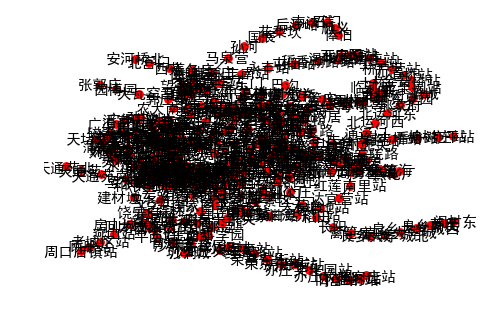

In [8]:
print_sub(lines)

In [63]:
line_graph = create_line_graph(lines)

In [64]:
line_graph['苹果园'].to_str()

"name = 苹果园,line_lable = 北京地铁1号线,next_stations = ['古城', '金安桥', '杨庄']"

In [65]:
line_graph['东单'].to_str()

"name = 东单,line_lable = 北京地铁1号线,next_stations = ['王府井', '建国门', '崇文门', '灯市口']"

In [66]:
line_graph['巴沟'].to_str()

"name = 巴沟,line_lable = 北京地铁10号线,next_stations = ['苏州街', '火器营']"

In [67]:
line_graph['西直门'].to_str()

"name = 西直门,line_lable = 北京地铁2号线,next_stations = ['积水潭', '车公庄', '动物园', '新街口', '明光桥西']"

In [74]:
line_graph['古城'].to_str()

"name = 古城,line_lable = 北京地铁1号线,next_stations = ['苹果园', '八角游乐园']"

In [84]:
search('苹果园', '东单', line_graph)

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单']

In [96]:
print_line(search('五棵松', '方庄', line_graph), line_graph)

五棵松🚇(北京地铁1号线) ---> 万寿路🚇(北京地铁1号线) ---> 公主坟🚇(北京地铁1号线) ---> 军事博物馆🚇(北京地铁1号线) ---> 北京西站🚇(北京地铁7号线) ---> 湾子🚇(北京地铁7号线) ---> 达官营🚇(北京地铁7号线) ---> 广安门内🚇(北京地铁7号线) ---> 菜市口🚇(北京地铁4号线) ---> 陶然亭🚇(北京地铁4号线) ---> 北京南站🚇(北京地铁4号线) ---> 永定门外🚇(北京地铁8号线（南段）) ---> 景泰🚇(北京地铁14号线（东段）) ---> 蒲黄榆🚇(北京地铁5号线) ---> 方庄🚇(北京地铁14号线（东段）)
